### Import Libraries

In [266]:
import pandas as pd
import numpy as np
import csv
import string, re
from pprint import pprint
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.moses import MosesDetokenizer

from bs4 import BeautifulSoup
import requests

### Q1) Write a function in python to sum up a given set of numbers other than itself

In [24]:
def listsum(numList):
    outArray = list()
    for i in numList:
        outArray.append(sum(list(numList))-i)
    return outArray

listsum([4,8,2,3])

[13, 9, 15, 14]

### Q2) Jobposts Data Exploration and Analysis

In [25]:
jobPostDF = pd.read_csv("data/data job posts.csv")

In [26]:
jobPostDF.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


b) Extract the following fields from the jobpost column:
1. Job Title
2. Position Duration
3. Position Location
4. Job Description
5. Job Responsibilities
6. Required Qualifications
7. Remuneration
8. Application Deadline
9. About Company

In [27]:
jobPostDF.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [28]:
cols_of_interest = ['Title', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 
                    'RequiredQual', 'Salary', 'Deadline', 'AboutC']

jobPostDF_B = jobPostDF[cols_of_interest]

In [29]:
jobPostDF_B.head(5)

,Title,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,Deadline,AboutC
0,Chief Financial Officer,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",NaN,26 January 2004,NaN
1,Full-time Community Connections Intern (paid i...,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN,12 January 2004,The International Research & Exchanges Board (...
2,Country Coordinator,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...
3,BCC Specialist,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,23 January 2004\r\nSTART DATE: Immediate,NaN
4,Software Developer,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,"20 January 2004, 18:00",NaN


c) Identify the company with the most number of job ads in the past 2 years

In [30]:
jobPostDF['date'] = pd.to_datetime(jobPostDF['date'], errors='coerce')

In [31]:
jobPostDF.date.max() - timedelta(days=730)

Timestamp('2013-12-30 00:00:00')

In [32]:
compdf = jobPostDF[jobPostDF['date']>='2013-12-30 00:00:00']

In [33]:
compdf.Company.value_counts()

Mentor Graphics Development Services CJSC                            64
ArmenTel CJSC                                                        59
Orange Armenia CJSC                                                  58
World Vision Armenia                                                 49
"Coca-Cola Hellenic Bottling Company Armenia" CJSC                   46
Career Center NGO                                                    41
Joomag AM LLC                                                        38
BetArchitect LLC                                                     38
Questrade International Inc., Armenian Branch                        36
Converse Bank CJSC                                                   33
Zeppelin Armenia LLC                                                 28
Tumo Center for Creative Technologies                                26
Energize Global Services CJSC                                        25
OSCE Office in Yerevan                                          

In [34]:
pprint("Company with the most number of job ads for the past 2 years: Mentor Graphics Development Services CJSC - 64")

('Company with the most number of job ads for the past 2 years: Mentor '
 'Graphics Development Services CJSC - 64')


d) Identify the month with the largest number of job ads over the years

In [35]:
jobPostDF['date'] = jobPostDF.date.astype(datetime)

In [36]:
jobPostDF['month'] = jobPostDF['date'].apply(lambda x: x.month)

In [37]:
jobPostDF.month.value_counts()

9.0     1652
10.0    1637
8.0     1613
7.0     1595
11.0    1573
3.0     1516
2.0     1499
12.0    1432
5.0     1412
4.0     1326
1.0     1269
6.0      180
Name: month, dtype: int64

In [38]:
pprint("Month with the largest number of job ads: 9.0(September)-1652")

'Month with the largest number of job ads: 9.0(September)-1652'


e) Clean text and generate new text from Job Responsibilities column: The new text shall not contain any stop words, and the plural words shall be converted into singular words.

In [598]:
#Due to limited processing power, I have taken random sample of 100 instead of the complete 19001 dataset. 
jobPostDFSample = jobPostDF.sample(100)

In [599]:
jobPostDFSample = jobPostDFSample.reset_index()

In [600]:
jobPostDFSample = jobPostDFSample.drop("index", axis=1)

In [601]:
pd.isnull(jobPostDFSample.JobRequirment[0])

False

In [602]:
lemmatizer = WordNetLemmatizer()
detokenizer = MosesDetokenizer()

In [603]:
for x in range(0, len(jobPostDFSample.JobRequirment)-1):
    if(pd.isnull(jobPostDFSample.JobRequirment[x]) == False):
        jobPostDFSample.JobRequirment[x] = word_tokenize(jobPostDFSample.JobRequirment[x])
        jobPostDFSample.JobRequirment[x] = [word.lower() for word in jobPostDFSample.JobRequirment[x] if 
                                            word not in stopwords.words('english')]
        jobPostDFSample.JobRequirment[x] = [lemmatizer.lemmatize(word) for word in jobPostDFSample.JobRequirment[x]]
        jobPostDFSample.JobRequirment[x] = [' '.join(jobPostDFSample.JobRequirment[x])]
        print(jobPostDFSample.JobRequirment[x])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\

["- responsible branch operation strategic financial planning control ; - responsible ongoing management branch staff ensuring realization organization 's hr policy procedure ; - ensure compliance credit operation branch organization 's objective , policy strategy , well local legislation ; - control process branch loan portfolio ensuring timely repayment effective customer service ; - keep connected public ; solve marketing issue ; - participate credit non-credit product development , modification implementation process ; - introduce lending condition decision customer ; - responsible financial risk assessment ; - responsible management document turnover ; - participate control lending repayment process ; - manage loan portfolio branch budget ; - ensure branch operation line local legal requirement , professional standard , objective strategy organization ."]
["- create compelling , entertaining relevant content company's website , social networking channel platform facebook specifica

['- regularly visit sale point product ; - represent product customer ; - identify new perspective client develop client relation ; - implement company marketing strategy field ; - develop , execute manage merchandising initiative ; - collect preliminary order .']
["- perform adaptation advertising promotional material within scope corresponding brand guideline ; - update develop design company 's website ; - coordinate production designed material ."]
['- value gold gem ; - create gold- gem-based loan collateral agreement ; - provide information customer term condition gold valuation gold-based loan ; - track gold price market provide recommendation supervisor .']
["- promote krka 's product ; - organize meeting presentation target specialist ."]
['- provide general administrative clerical support ; - edit scientific text english language professional level ; - provide translation .']
['- review internal control , identify ass risk , evaluate operating effectiveness process system , e

['- write php javascript code ; - work part software development team ; - read , understand modify existing code ; - provide technical support assistance , requested .']
['- country contact one region : germany , uk , france , denmark , sweden , italy , spain netherlands ; - validation incoming order correctness ; - accurate timely set campaign campaign related information within necessary tool ( doubleclick adserver/ sap ) ; - monitor , analyse report campaign performance assigned advertiser ; - coordination campaign optimization sale force ; - effective communication co-operation sale force client .']
["- responsible proper functionality module 1c system ; - offer implement optimal solution development business process company ; - provide 1c program update , release integration ; - collect analyze user 's need , test find solution ; - responsible timely archivation software backup ; - responsible 1c software monitoring troubleshooting ."]
['- visit site sketch object designed ; - do 

["- carry current accounting formulation ; - carry banking operation , project formulation ; - maintain company 's credit debt account ; - carry cash transaction ; - make tax social welfare report ; - make financial report ."]
['- sign agreement sanatorium resort armenia future cooperation ; - introduce information , catalog rate resort hotel world customer ; - find new beneficial partner tour operator internet future cooperation ; - arrange visa registration , hotel air ticket reservation , make arrangement medical insurance .']
['- conduct field level assessment target community verify school data identify major need gap relation program objective ; - contribute development detailed implementation plan oversee progress monitoring visit . liaise community , local authority school management day-to-day basis provide on-going assistance throughout implementation period ; - work target community build partnership mobilize stakeholder resource effective delivery project achievement sustai

['- ensure smooth operation network twenty-four-hour basis ; - ensure timely realization network construction work per defined schedule ; - monitor implementation scheduled preventive restoration work ; - control make sure availability accuracy document related operation construction , well financial activity held ; - control supervise activity performed network digitalization number connection ; - provide mobile communication unit digital channel within defined time-terms .']
["- prepare regular internal audit report assist preparation external audit report ; - examine analyze accounting record determine financial status establishment prepare financial report concerning operating procedure : review data regarding material asset , net worth , liability , capital stock , surplus , income , expenditure ; - inspect item book original entry determine accepted accounting procedure followed recording transaction ; - ass effectiveness internal control system compliance rule , procedure , appl

["duty include , limited following : - maintain labor contract various register journal company 's accounting system ; - calculate staff salary , tax payment payable state budget ; - prepare payment order , make payment get receipt bank ; - prepare monthly , quarterly annual financial report well advance , submit review partner accounting company ; - submit tax financial report reviewed accounting company relevant state authority ; - submit request opening individual account individual report social security fund republic armenia , - ensure accuracy accounting documentation ; - perform accounting related administrative duty assigned supervisor ."]
["- promote medical product represented company field therapy , cardiology neurology ; - organize promotional event ; - perform activity necessary promoting company's medicine ."]
['- maintain day day secretarial duty within finance department company ( letter , fax , mailing phone call ) ; - provide finance director comprehensive assistance 

["- answer customer call u english spoken country ; - provide first level support company 's application via phone email ; - create help content company 's application ; - create content web site ."]
['- responsible meat technology development ; - responsible convenience food technology development ; - responsible definition quota .']
['- design professional company powerpoint presentation ; - design professional corporate website ; - design high-quality weekly email newsletter ; - design marketing material ( flyer , booklet , etc . ) .']
['- provide legal advice acting law legal act republic armenia related activity bank , provide update legislative change ; - review develop various type contract legal document support activity bank ; - provide legal opinion various legal issue , requested management board ; - represent bank interest court ; - understand support corporate mission procredit holding .']


f) Write functions to identify null/NA values and to replace null/NA values with a
custom message in “Duration” column - Here I choose "TBD"(To Be Decided) as the custom message

In [162]:
def Duration_Null_Values_Replacement(df):
    for x in range(0, len(df.Duration)-1):
        if(pd.isnull(df.Duration[x]) == True):
            df.Duration[x] = "TBD"

In [163]:
Duration_Null_Values_Replacement(jobPostDFSample)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [164]:
jobPostDFSample.Duration.isnull().sum()

0

g) Store the results in a new Dataframe/SQL table(s)

In [165]:
jobPostDFSample

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT,month
0,World Vision Armenia\r\nTITLE: Senior Procure...,2012-01-17 00:00:00,Senior Procurement Officer / Team Leader,World Vision Armenia,NaN,Full-time,NaN,NaN,NaN,Long-term,...,"To apply for this position, please send a lett...",18 January 2012,01 February 2012,NaN,World Vision is a Christian humanitarian and d...,NaN,2012,1,False,1.0
1,WSDII PIU\r\nTITLE: Lawyer\r\nTERM: Full tim...,2004-11-19 00:00:00,Lawyer,WSDII PIU,NaN,Full time,Everybody,NaN,December 2004,"Three months initially (approbatory period), w...",...,Please submit your CVs and Letter of interest\...,19 November 2004,01 December 2004\r\nABOUT: This project is fu...,NaN,NaN,NaN,2004,11,False,11.0
2,London School of Commerce\r\nTITLE: MBA (Mast...,2010-11-04 00:00:00,MBA (Master of Business Administration) & BA (...,London School of Commerce,NaN,NaN,Students from developing countries,NaN,February 2011,"MBA - 1 year, BA - 2 years",...,Those who are interested in the programmes are...,04 November 2010,06 January 2011,NaN,London School of Commerce is fully accredited ...,The following attachment(s) to this announceme...,2010,11,False,11.0
3,"""Fast Credit"" LLC\r\nTITLE: IT System Adminis...",NaT,IT System Administrator (FreeBSD),"""Fast Credit"" LLC",NaN,NaN,All eligible and interested candidates,NaN,NaN,ASAP,...,Please submit your resumes in Armenian and\r\n...,15 June 2010,09 July 2010,NaN,"""Fast Credit"" LLC is a company operating a net...",NaN,2010,6,True,NaN
4,Ameriabank CJSC\r\nTITLE: Business Promotion ...,2012-05-29 00:00:00,Business Promotion Center Retail Specialist,Ameriabank CJSC,NaN,NaN,NaN,NaN,ASAP,TBD,...,All interested and qualified candidates are\r\...,29 May 2012,13 June 2012,NaN,NaN,The following attachment(s) to this announceme...,2012,5,False,5.0
5,Brabion Flora Service Ltd.\r\nTITLE: Office M...,2009-08-14 00:00:00,Office Manager,Brabion Flora Service Ltd.,NaN,NaN,Everyone,NaN,ASAP,Long term,...,CV and photo of the applicant should be\r\nsub...,14 August 2009,26 August 2009,NaN,Brabion Flora Service Ltd. is a flower company...,NaN,2009,8,False,8.0
6,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",2011-01-17 00:00:00,Fleet Mechanic,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,NaN,NaN,NaN,NaN,TBD,...,All interested candidates are kindly requested...,18 January 2011,31 January 2011,NaN,NaN,NaN,2011,1,False,1.0
7,World Vision Armenia\r\n\r\n\r\nTITLE: Projec...,2015-10-29 00:00:00,Project Coordinator for Caring for Equality Pr...,World Vision Armenia,NaN,NaN,NaN,NaN,NaN,2 years with a possible extension.,...,"If you are interested in this position, to\r\n...",29 October 2015,12 November 2015,NaN,World Vision is a Christian humanitarian and d...,NaN,2015,10,False,10.0
8,GNC-Alfa CJSC\r\nTITLE: Product/ Service Deve...,2012-08-08 00:00:00,Product/ Service Development Specialist,GNC-Alfa CJSC,M-01,NaN,NaN,NaN,Immediate employment,TBD,...,"To apply for this position, please submit a\r\...",08 August 2012,16 August 2012,NaN,GNC-ALFA CJSC (Rostelecom Group) is a licensed...,NaN,2012,8,False,8.0
9,"""Youth For Achievements Association (YFA)\r\nT...",2005-08-24 00:00:00,Training Liaison/ Monitor,"""Youth For Achievements Association (YFA)",NaN,NaN,NaN,NaN,01 September 2005,Till 01 June 2006,...,Interested candidates should submit their\r\nr...,24 August 2005,29 August 2005,NaN,YFA is an Educational Non-Governmental Organiz...,NaN,2005,8,False,8.0


### Q3. Semantic similarity

a) Using the output from Q2, identify semantically similar job ads and group them together.

In [121]:
jobPostDFSample

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT,month
0,Orange Armenia CJSC\r\n\r\n\r\nTITLE: Physica...,2015-09-28 00:00:00,"Physical Security, Health and Safety Specialist",Orange Armenia CJSC,NaN,NaN,NaN,NaN,ASAP,Permanent,...,Qualified and interested candidates are\r\nenc...,28 September 2015,15 October 2015,NaN,NaN,NaN,2015,9,False,9.0
1,Rural Areas Economic Development Program Analy...,NaT,Monitoring and Evaluation Specialist,Rural Areas Economic Development Program Analy...,NaN,Full time,All interested and qualified candidates.,NaN,ASAP,"Long term, with 3 months probation period.",...,Interested candidates should email their\r\nre...,15 June 2006,25 June 2006,NaN,The Rural Areas Economic Development Programme...,NaN,2006,6,False,NaN
2,Lycos Europe\r\nTITLE: Senior Customer Care M...,2004-11-08 00:00:00,Senior Customer Care Manager,Lycos Europe,NaN,NaN,NaN,NaN,ASAP,Permanent,...,Please send us your CV in English as well as a...,08 November 2004,19 November 2004,NaN,Lycos Europe is one of the leading European In...,NaN,2004,11,False,11.0
3,Mentor Graphics Development Services CJSC\r\n\...,2015-08-25 00:00:00,"Senior Technical Marketing Engineer, Design to...",Mentor Graphics Development Services CJSC,NaN,Full-time,NaN,NaN,Upon hiring,Long-term,...,Interested candidates are asked to submit a CV...,26 August 2015,25 September 2015,NaN,Mentor Graphics Development Services CJSC is a...,NaN,2015,8,False,8.0
4,Yerevan Productions\r\nTITLE: Marketing and S...,NaT,Marketing and Sales Manager,Yerevan Productions,NaN,NaN,NaN,NaN,NaN,Long term,...,Interested candidates should send a CV to:job@...,10 June 2008,30 June 2008,NaN,NaN,NaN,2008,6,False,NaN
5,Armenian Development Bank\r\nTITLE: Financial...,NaT,Financial Reports and Analysis Department Spec...,Armenian Development Bank,NaN,Full time,NaN,NaN,ASAP,"Long term, with 3 months probation period.",...,Only those who meet all the above mentioned\r\...,16 March 2015,05 April 2015,NaN,NaN,NaN,2015,3,False,NaN
6,Converse Bank CJSC\r\nTITLE: Bank Chief Econo...,2011-08-05 00:00:00,Bank Chief Economic Analyst,Converse Bank CJSC,NaN,NaN,NaN,NaN,NaN,TBD,...,All interested candidates who meet the\r\nrequ...,05 August 2011,04 September 2011,NaN,NaN,The following attachment(s) to this announceme...,2011,8,False,8.0
7,"EPAM Systems, Inc.\r\nTITLE: C#.NET Senior De...",2007-10-16 00:00:00,C#.NET Senior Developer/ Architect,"EPAM Systems, Inc.",EPM01,Full time,NaN,Professionals,ASAP,Permanent,...,"Please, email your CVs to: jobs@... and\r\nref...",17 October 2007,16 November 2007,"In 2006 EPAM Systems merged with VDI, which ha...",According to Brown-Wilson Group Survey* EPAM S...,NaN,2007,10,True,10.0
8,Gallery Systems CJSC\r\nTITLE: Digital IC Des...,2011-04-15 00:00:00,Digital IC Designer,Gallery Systems CJSC,NaN,Full time,NaN,NaN,ASAP,Long term,...,"If interested, please send your Resume in\r\nE...",15 April 2011,01 May 2011,NaN,"For information about the company, please visi...",NaN,2011,4,False,4.0
9,"CNFA, Inc.\r\nTITLE: Data Collection, Managem...",2006-08-01 00:00:00,"Data Collection, Management and Reporting Advisor","CNFA, Inc.",NaN,NaN,NaN,NaN,NaN,TBD,...,"To apply, please email your resumes to:pnorrel...",01 August 2006,10 August 2006,NaN,"CNFA, Inc. is a Washington, DC-based, not-for-...",NaN,2006,8,False,8.0


Grouping based on IT or non-IT position

In [572]:
type_colors = ['#78C850', '#F08030']

IT examples = 25
Non-IT examples = 75
Proportion of IT to Non-IT examples = 33.33%


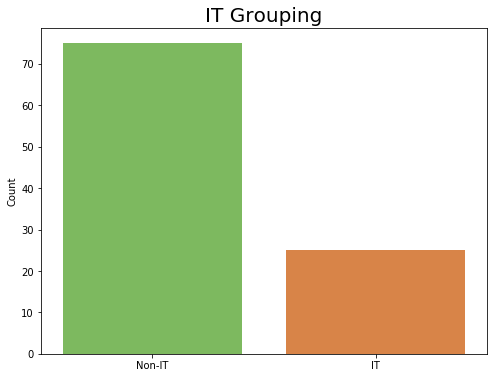

In [574]:
it = jobPostDFSample[jobPostDFSample['IT'] == True].shape[0]
non_it = jobPostDFSample[jobPostDFSample['IT'] == False].shape[0]
print(f"IT examples = {it}")
print(f"Non-IT examples = {non_it}")
print(f"Proportion of IT to Non-IT examples = {(it / non_it) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(jobPostDFSample['IT'], palette=type_colors)
plt.xticks((0, 1), ["Non-IT", "IT"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("IT Grouping", y=1, fontdict={"fontsize": 20});

Find the similarity based on Job Requirements

In [590]:
from gensim import corpora, models, similarities
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [582]:
jobPostDFSample['JobDescription'].fillna("TBD", inplace=True)

In [583]:
documents = jobPostDFSample.JobDescription

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)

In [591]:
similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

In [594]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tfidf_matrix)

In [595]:
kmeans.labels_

array([3, 4, 0, 2, 2, 1, 2, 3, 0, 4, 2, 2, 3, 2, 4, 3, 3, 1, 4, 2, 1, 4,
       4, 0, 1, 3, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 3,
       0, 0, 0, 4, 4, 0, 4, 4, 1, 0, 1, 4, 1, 3, 3, 2, 0, 0, 4, 0, 4, 4,
       0, 1, 4, 2, 0, 4, 0, 3, 0, 4, 0, 4, 3, 1, 2, 0, 0, 2, 1, 2, 0, 4,
       2, 4, 3, 4, 4, 4, 4, 3, 1, 1, 1, 1])

-Due to insufficient time, I would like to explain my next few steps:-
<br>    1) Plot the ads by its kmeans labels
<br>    2) Retrieve the row number for each label 
<br>    3) Recalculate similarity based on Job Requirement using PCA

### Q4. Music and Artists

b) Extract raw text from https://en.wikipedia.org/wiki/1990s_in_music

In [301]:
list_of_genre_1990s = list()
respond = requests.get("https://en.wikipedia.org/wiki/1990s_in_music")
soup = BeautifulSoup(respond.text)
l = soup.find_all('ul')
list_of_genre_1990s.append(l[3].text.split(','))

C:\Users\lenovo\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\lenovo\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [302]:
list_of_genre_1990s_1 = list()
for x in list_of_genre_1990s[0]:
    list_of_genre_1990s_1 = x.strip('').split('\n')

In [303]:
len(list_of_genre_1990s_1)

30

In [304]:
list_of_genre_1990s_clean = list()
for x in list_of_genre_1990s_1:
    if(x != ''):
        list_of_genre_1990s_clean.append(x)

In [305]:
for x in range(0,len(list_of_genre_1990s_clean)):
    list_of_genre_1990s_clean[x] = re.sub('\.[0-9]+', '', list_of_genre_1990s_clean[x]).strip('')[2:]

In [306]:
del list_of_genre_1990s_clean[-1]

In [307]:
list_of_genre_1990s_clean

['Rock',
 'Alternative rock',
 'Alternative metal',
 'Grunge',
 'Post-grunge',
 'Indie rock',
 'Ska punk',
 'Skate punk and pop punk',
 'Heavy metal',
 'Pop rock and singer-songwriter',
 'Hard rock',
 'Pop',
 'Adult Contemporary',
 'Contemporary R&B',
 'Neo-Soul',
 'Hip hop',
 'Electronic music',
 'Country music']

c) Extract best-selling music artists from https://en.wikipedia.org/wiki/List_of_bestselling_music_artists

In [472]:
respond = requests.get("https://en.wikipedia.org/wiki/List_of_best-selling_music_artists")
soup = BeautifulSoup(respond.text)
l = soup.find_all('tr')
pprint(l[1].text)

C:\Users\lenovo\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\lenovo\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


('\n'
 'The Beatles\n'
 'United Kingdom\n'
 '1960–1970[10]\n'
 '1962[10]\n'
 'Rock / Pop[10]\n'
 '7002271600000000000♠\n'
 '\n'
 '\n'
 'Total available certified units: 271.6 million\n'
 '\n'
 '\n'
 'US: 212.250 million[11]\n'
 'JPN: 4.950 million[c][12]\n'
 'UK: 18.445 million[c][13]\n'
 'GER: 8 million[c][14]\n'
 'FRA: 3.890 million[c][15][16]\n'
 'CAN: 14.455 million[c][17]\n'
 'AUS: 3.060 million[c][18][19]\n'
 'ITA: 380,000[c][20]\n'
 'BRA: 550,000[c][21]\n'
 'SWE 485,000[c][22]\n'
 'SPA: 1.250 million[c][23][24]\n'
 'SWI: 350,000[c][25]\n'
 'BEL: 390,000[c][26][27]\n'
 'ARG: 1.606 million[c][28][29]\n'
 'DEN: 270,000[c][30][31][32]\n'
 'AUT: 500,000[c][33]\n'
 'POL: 175,000[c][34]\n'
 'NZ: 660,000[c][35][36]\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '600 million[37][38]\n'
 '500 million[39]\n')


In [473]:
unprocessed_list = list()
for i in l:
    unprocessed_list.append(i.text)

In [474]:
del unprocessed_list[0]

In [475]:
del unprocessed_list[-19:]

In [476]:
del unprocessed_list[7]

In [477]:
del unprocessed_list[16]

In [478]:
del unprocessed_list[32]

In [479]:
del unprocessed_list[72]

In [480]:
del unprocessed_list[93]

In [481]:
len(unprocessed_list)

111

In [492]:
for i, x in enumerate(unprocessed_list):
    unprocessed_list[i] = x.split('\n')

In [505]:
artist = list()
for x, i in enumerate(unprocessed_list):
    if (unprocessed_list[x][1]):
        artist.append(unprocessed_list[x][1])

In [506]:
len(artist)

111

In [507]:
genre = list()
for x, i in enumerate(unprocessed_list):
    genre.append(unprocessed_list[x][5])

In [511]:
len(genre)

111

In [512]:
years = list()
for x, i in enumerate(unprocessed_list):
    years.append(unprocessed_list[x][3])

In [513]:
len(years)

111

In [515]:
artistYearGenreDF = pd.DataFrame({'Artist': artist, 'Years': years, 'Genre': genre})

In [566]:
artist_genre_list = list()
for index, row in artistYearGenreDF.iterrows():
    for gen in list_of_genre_1990s_clean:
        if (artistYearGenreDF.Genre[index].startswith(gen) == True):
            if (artistYearGenreDF.Years[index][5:9] >= '1990' or artistYearGenreDF.Years[index][5:12] == 'present'):
                artist_genre_list.append(artistYearGenreDF.Artist[index])

d) Find out how many best-selling music artists are from 1990s

In [570]:
print("Number of best-selling music artists from 1990s:", len(artist_genre_list))

Number of best-selling music artists from 1990s: 59
